# About Dataset
The dataset provided contains information about chocolate sales made by different salespeople in various regions.

It includes details such as the name of the salesperson, the geographic location of the sale, the product sold, the amount generated from the sale, the number of units sold, the cost per unit, the total cost, the profit earned, and
the profit percentage.

The data shows that sales vary greatly across different regions, with the highest sales generated in Canada by Carla Molina, who sold Drinking Coco for 9,632 USD and earned a profit of 7,769 USD, which is an impressive profit margin of 

81%. On the other hand, Curtice Advani from the UK had a negative profit margin of -159%, indicating that the cost of selling White Choc was higher than the amount generated from sales.

The dataset also provides insights into the most popular products sold, with Choco Coated Almonds being the most popular product sold in the US

Overall, the dataset provides valuable insights into chocolate sales, highlighting the importance of factors such as product popularity, regional variations, and profit margins in determining the success of sales.

Format : CSV

Dataset Contains:

- Sales Person

- Geography

- Product

- Amount

- Units

- cost per unit

- Cost

- Profit

- profit %




<img src="https://github.com/Kodchalerk/Chocolate-Sales/blob/main/pic/chocolate.jpg?raw=True" alt="Drawing" style="width: 600px;"/>



*The purpose of this notebook is to find more deeper insights other than provided raw dataset by asking the following questions:*

**1. Which products generate the most profit?**

**2. Which country generated the highest profit?**

**3. The best Sales person by region and overall**

**4. The most popular products in each region**


Link to dataset: https://www.kaggle.com/datasets/prajwal6362venom/choclate-sales-project

# Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_rows',50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\zerotopandas\\choco.csv')
df

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%


# Data Cleaning

In [3]:
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [4]:
#Drop unused columns
df.drop(columns = ['profit','profit_%','cost'],inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sales_person   300 non-null    object
 1   geography      300 non-null    object
 2   product        300 non-null    object
 3   amount         300 non-null    object
 4   units          300 non-null    int64 
 5   cost_per_unit  300 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [6]:
df

,sales_person,geography,product,amount,units,cost_per_unit
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9
2,Husein Augar,USA,Almond Choco,$959,147,12
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6
4,Curtice Advani,UK,White Choc,"$2,100",414,13
...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12


In [9]:
#Transform amount columns
df['amount'] = df['amount'].str.replace('$','').str.replace(',','')

def stripping(x):
    return x.strip()

df['amount'] = df['amount'].apply(stripping).astype('int64')


In [12]:
#Rename for clarification
df.rename(columns = {'amount':'total_sales'},inplace = True)

In [13]:
# Recalculate profit and total cost
df['total_cost']= df['units'] * df['cost_per_unit']

In [14]:
# Calculate profit
df['profit'] = df['total_sales'] - df['total_cost']

In [21]:
# Calculate profit percentage
df['profit_percent'] = round((df['profit'] / df['total_cost']) *100,2)

In [22]:
df

,sales_person,geography,product,total_sales,units,cost_per_unit,total_cost,profit,profit_percent
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1596,28,1.75
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,4131,2575,62.33
2,Husein Augar,USA,Almond Choco,959,147,12,1764,-805,-45.63
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1728,7904,457.41
4,Curtice Advani,UK,White Choc,2100,414,13,5382,-3282,-60.98
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4392,-3454,-78.64
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1818,7023,386.30
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1512,2506,165.74
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2772,-2058,-74.24


In [23]:
# Check data integrity
## categorical columns
col_cat = df.select_dtypes('object')
for i in col_cat:
    print('Unique values of {} are {}'.format(i,df[i].unique()))
    print('Number of unique values {}'.format(df[i].nunique()))
    print('****************************************************')

Unique values of sales_person are ['Ram Mahesh' 'Brien Boise' 'Husein Augar' 'Carla Molina' 'Curtice Advani'
 'Ches Bonnell' 'Gigi Bohling' 'Barr Faughny' 'Gunar Cockshoot'
 'Oby Sorrel']
Number of unique values 10
****************************************************
Unique values of geography are ['New Zealand' 'USA' 'Canada' 'UK' 'Australia' 'India']
Number of unique values 6
****************************************************
Unique values of product are ['70% Dark Bites' 'Choco Coated Almonds' 'Almond Choco' 'Drinking Coco'
 'White Choc' 'Peanut Butter Cubes' 'Smooth Sliky Salty' 'After Nines'
 '50% Dark Bites' 'Eclairs' 'Mint Chip Choco' 'Milk Bars'
 'Manuka Honey Choco' 'Orange Choco' 'Fruit & Nut Bars' '99% Dark & Pure'
 'Raspberry Choco' '85% Dark Bars' 'Organic Choco Syrup'
 'Caramel Stuffed Bars' 'Spicy Special Slims' "Baker's Choco Chips"]
Number of unique values 22
****************************************************


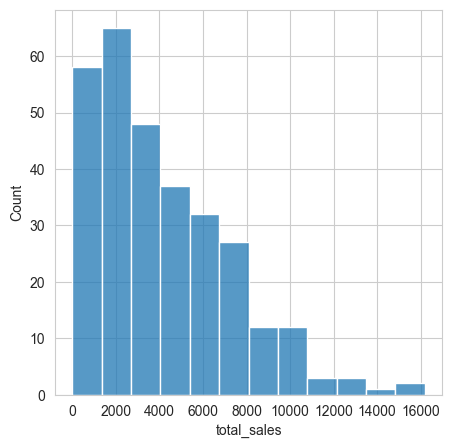

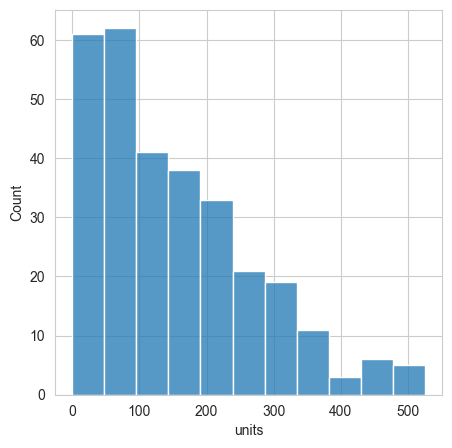

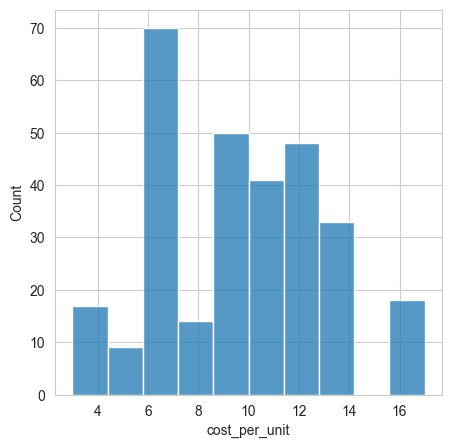

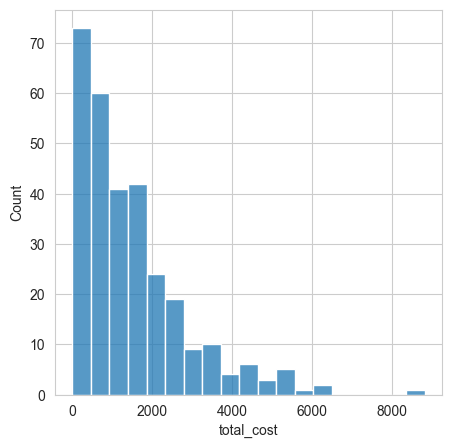

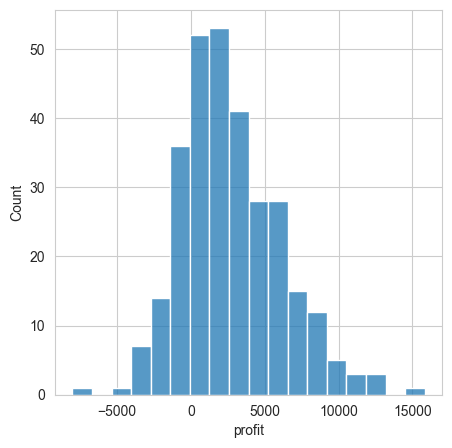

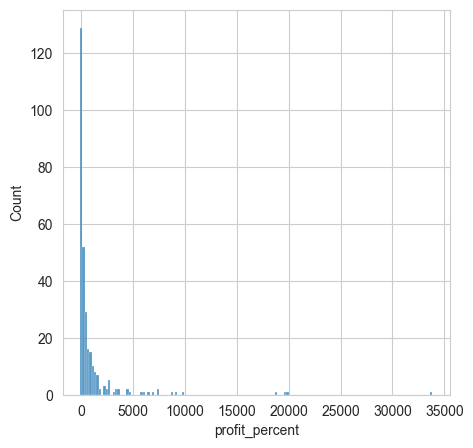

In [24]:
# Check numerical columns
col_num = df.select_dtypes(['int64' , 'float64'])
for i in col_num:
    plt.figure(figsize = (5,5))
    sns.histplot(df, x = df[i])
    plt.show()

- No anomalies detected in both numerical and categorical data

In [25]:
df

,sales_person,geography,product,total_sales,units,cost_per_unit,total_cost,profit,profit_percent
0,Ram Mahesh,New Zealand,70% Dark Bites,1624,114,14,1596,28,1.75
1,Brien Boise,USA,Choco Coated Almonds,6706,459,9,4131,2575,62.33
2,Husein Augar,USA,Almond Choco,959,147,12,1764,-805,-45.63
3,Carla Molina,Canada,Drinking Coco,9632,288,6,1728,7904,457.41
4,Curtice Advani,UK,White Choc,2100,414,13,5382,-3282,-60.98
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,938,366,12,4392,-3454,-78.64
296,Gunar Cockshoot,Australia,Baker's Choco Chips,8841,303,6,1818,7023,386.30
297,Barr Faughny,UK,Peanut Butter Cubes,4018,126,12,1512,2506,165.74
298,Carla Molina,New Zealand,Raspberry Choco,714,231,12,2772,-2058,-74.24


# Finding Insights

## **1. Which products generate the most profit?**

In [123]:
# Overview the data with pivot table
pd.pivot_table(df,index = 'product' , columns = 'geography' , values = 'profit')

geography,Australia,Canada,India,New Zealand,UK,USA
product,,,,,,
50% Dark Bites,-166.500000,NaN,725.500000,3054.666667,3112.000000,1841.666667
70% Dark Bites,5761.000000,3997.000000,-1722.000000,252.000000,2607.500000,1191.750000
85% Dark Bars,2102.500000,NaN,7917.000000,5888.000000,2842.333333,1810.500000
99% Dark & Pure,4130.000000,665.333333,3074.250000,2586.000000,NaN,971.666667
After Nines,2002.666667,8015.000000,2206.000000,2491.000000,3984.666667,1898.333333
Almond Choco,4587.333333,4209.000000,-51.000000,-2839.500000,NaN,-563.666667
Baker's Choco Chips,2984.000000,-1126.000000,4863.250000,4147.800000,3419.666667,-856.000000
Caramel Stuffed Bars,3923.500000,-1441.500000,6699.000000,2065.500000,2023.333333,3804.500000
Choco Coated Almonds,3360.500000,4053.000000,3818.333333,NaN,NaN,6408.500000


Text(0.5, 1.0, 'Ranking products by profit')

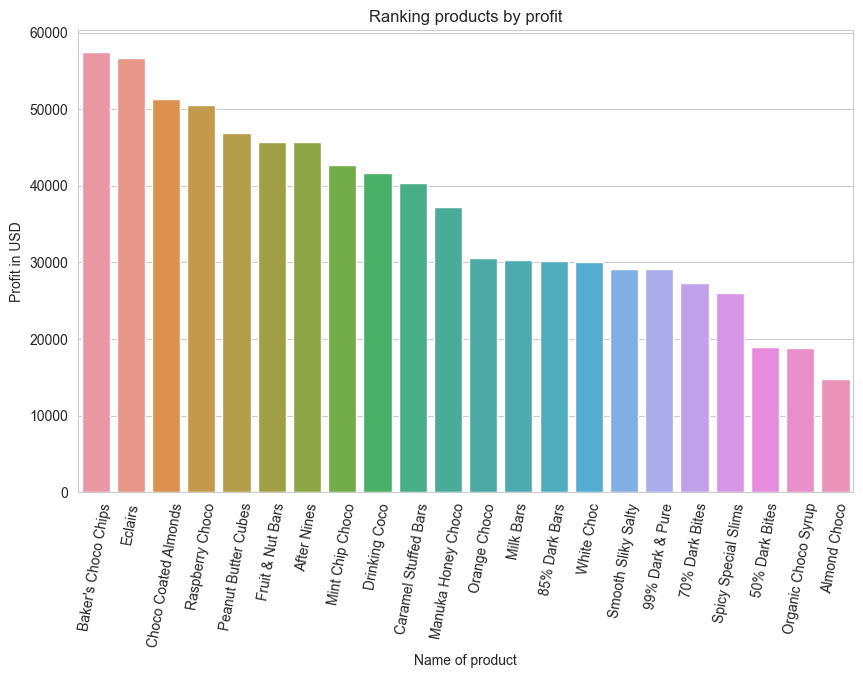

In [46]:
prof = df.groupby('product')['profit'].sum().sort_values(ascending = False).to_frame()
plt.figure(figsize = (10,6))
sns.barplot(prof, x = prof.index , y = 'profit')
plt.xticks(rotation = 80)
plt.ylabel('Profit in USD')
plt.xlabel('Name of product')
plt.title('Ranking products by profit')

## **2. Which country generated the highest profit?**

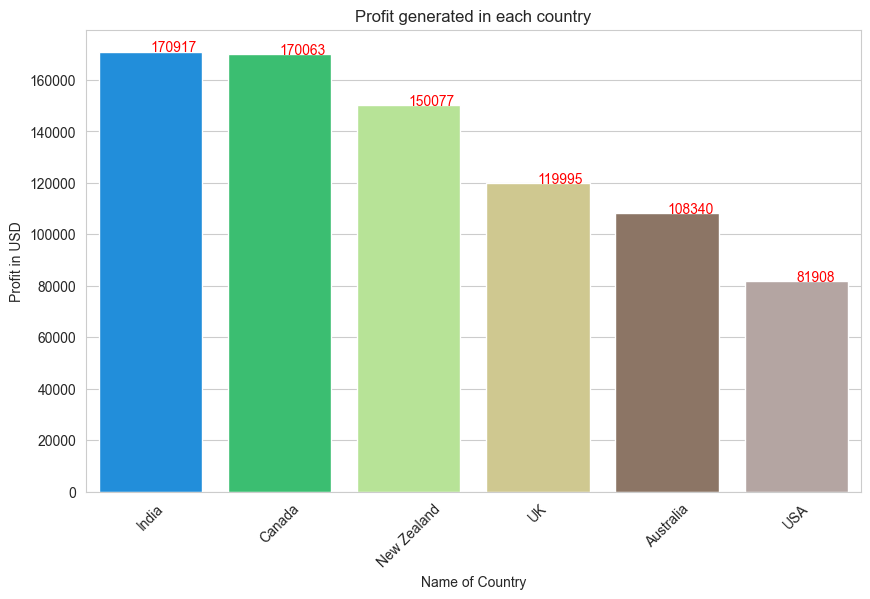

In [179]:
geo = df.groupby('geography')['profit'].sum().sort_values(ascending = False).to_frame()
plt.figure(figsize = (10,6))
sns.barplot(geo, x = geo.index , y = 'profit' , palette = 'terrain')
plt.xticks(rotation = 45)
plt.ylabel('Profit in USD')
plt.xlabel('Name of Country')
plt.title('Profit generated in each country')

for i,j in enumerate(geo.profit):
    plt.text(i,j,j , color = 'red')

## **3. The best Sales person by region and overall**

In [64]:
#Overview data by pivot table
pd.pivot_table(df, values = 'profit' , index = 'sales_person' , columns = 'geography')

geography,Australia,Canada,India,New Zealand,UK,USA
sales_person,,,,,,
Barr Faughny,2719.400000,2510.400000,3158.500000,4585.600000,2860.700000,556.500000
Brien Boise,769.500000,4119.000000,908.500000,2171.666667,5746.500000,857.857143
Carla Molina,2883.000000,3770.428571,1885.800000,1357.500000,3112.000000,1557.400000
Ches Bonnell,2349.250000,2466.666667,2733.250000,4876.571429,650.000000,2613.142857
Curtice Advani,946.000000,3934.333333,2086.444444,2187.428571,1364.200000,-376.750000
Gigi Bohling,5654.250000,6013.333333,4185.857143,3262.250000,3270.750000,3474.666667
Gunar Cockshoot,7023.000000,2995.800000,2853.750000,1614.750000,1588.500000,412.666667
Husein Augar,3435.333333,4555.000000,4917.666667,1638.714286,2020.333333,809.250000
Oby Sorrel,1096.250000,1042.200000,2626.200000,1648.333333,7468.500000,1057.600000


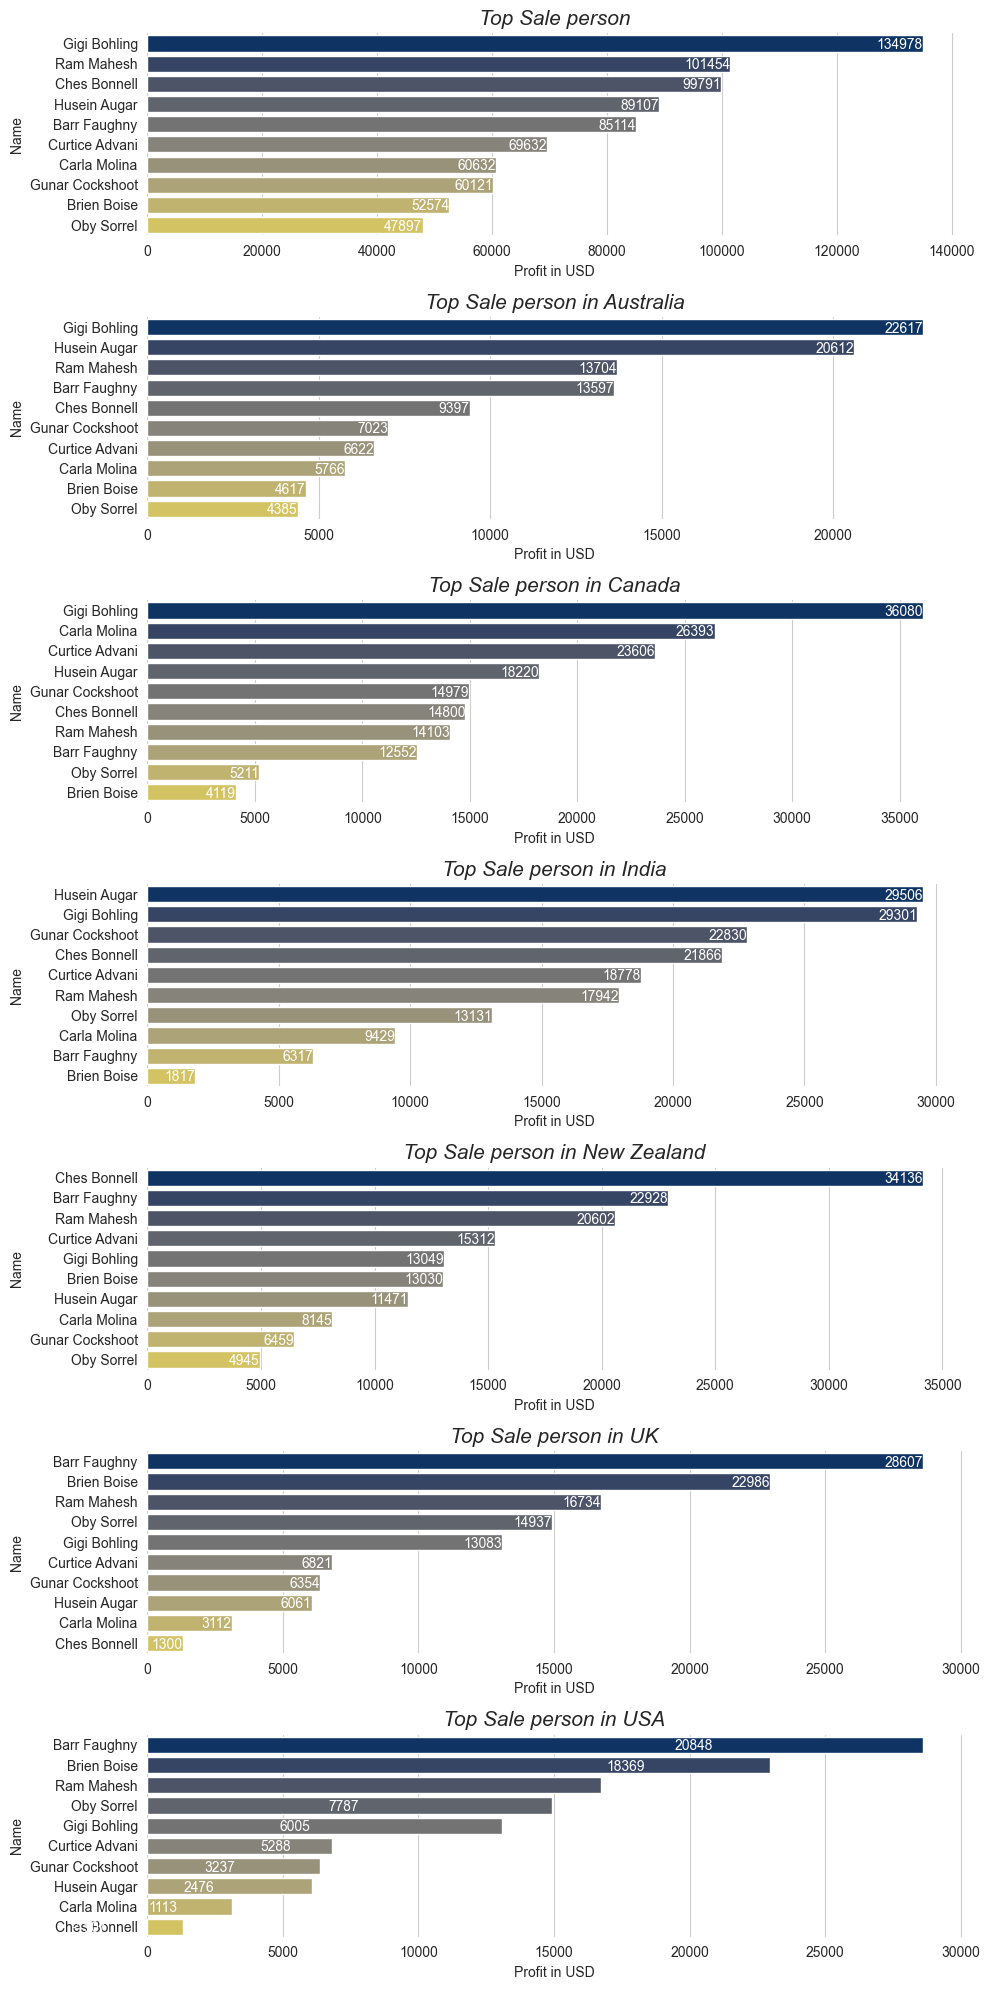

In [117]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(7,1,1)
best_sale = df.groupby(['sales_person','geography'])['profit'].sum().reset_index()
overall = best_sale.groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax = sns.barplot(overall , y = overall.index , x = 'profit', palette = 'cividis')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Top Sale person' , fontsize = 15 , style = 'italic')
ax.set_ylabel('Name')
ax.set_xlabel('Profit in USD')
for i,j in enumerate(overall.profit):
     ax.text(j,i,j , color="white", ha="right", va="center_baseline")
###########

ax1 = fig.add_subplot(7,1,2)
australia = best_sale[best_sale['geography'] == 'Australia'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax1 = sns.barplot(australia , y = australia.index , x = 'profit', palette = 'cividis')
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Top Sale person in Australia' , fontsize = 15 , style = 'italic')
ax1.set_ylabel('Name')
ax1.set_xlabel('Profit in USD')
for i,j in enumerate(australia.profit):
     ax1.text(j,i,j , color="white", ha="right", va="center_baseline")

###########

ax2 = fig.add_subplot(7,1,3)
canada = best_sale[best_sale['geography'] == 'Canada'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax2 = sns.barplot(canada , y = canada.index , x = 'profit', palette = 'cividis')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Top Sale person in Canada' , fontsize = 15 , style = 'italic')
ax2.set_ylabel('Name')
ax2.set_xlabel('Profit in USD')
for i,j in enumerate(canada.profit):
     ax2.text(j,i,j , color="white", ha="right", va="center_baseline")
########
ax3 = fig.add_subplot(7,1,4)
india = best_sale[best_sale['geography'] == 'India'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax3 = sns.barplot(india, y = india.index , x = 'profit', palette = 'cividis')
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Top Sale person in India' , fontsize = 15 , style = 'italic')
ax3.set_ylabel('Name')
ax3.set_xlabel('Profit in USD')
for i,j in enumerate(india.profit):
     ax3.text(j,i,j , color="white", ha="right", va="center_baseline")
########
ax4 = fig.add_subplot(7,1,5)
newzealand = best_sale[best_sale['geography'] == 'New Zealand'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax4 = sns.barplot(newzealand, y = newzealand.index , x = 'profit', palette = 'cividis')
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Top Sale person in New Zealand' , fontsize = 15 , style = 'italic')
ax4.set_ylabel('Name')
ax4.set_xlabel('Profit in USD')
for i,j in enumerate(newzealand.profit):
     ax4.text(j,i,j , color="white", ha="right", va="center_baseline")
#########
ax5 = fig.add_subplot(7,1,6)
UK = best_sale[best_sale['geography'] == 'UK'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax5 = sns.barplot(UK, y = UK.index , x = 'profit', palette = 'cividis')
ax5.spines['left'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_title('Top Sale person in UK' , fontsize = 15 , style = 'italic')
ax5.set_ylabel('Name')
ax5.set_xlabel('Profit in USD')
for i,j in enumerate(UK.profit):
     ax5.text(j,i,j , color="white", ha="right", va="center_baseline")
        
#########
ax6 = fig.add_subplot(7,1,7)
USA = best_sale[best_sale['geography'] == 'USA'].groupby('sales_person')['profit'].sum().to_frame().sort_values('profit',ascending = False )
ax6 = sns.barplot(UK, y = UK.index , x = 'profit', palette = 'cividis')
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Top Sale person in USA' , fontsize = 15 , style = 'italic')
ax6.set_ylabel('Name')
ax6.set_xlabel('Profit in USD')
for i,j in enumerate(USA.profit):
     ax6.text(j,i,j , color="white", ha="right", va="center_baseline")
        
        
plt.tight_layout()

## **4. The most popular products in each region**

In [171]:
country = ['New Zealand', 'USA', 'Canada', 'UK', 'Australia', 'India']

In [172]:
sort_country = df.groupby(['geography','product'])['profit'].sum().to_frame().reset_index().sort_values(['geography','profit'], ascending = False)

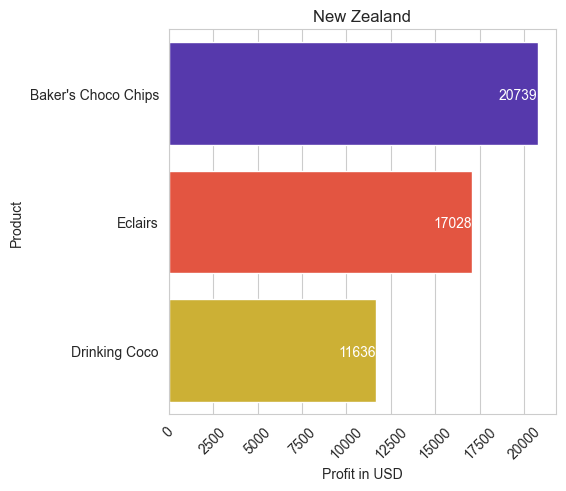

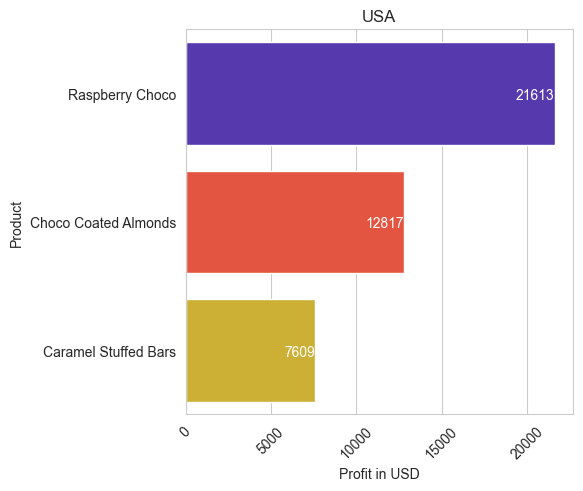

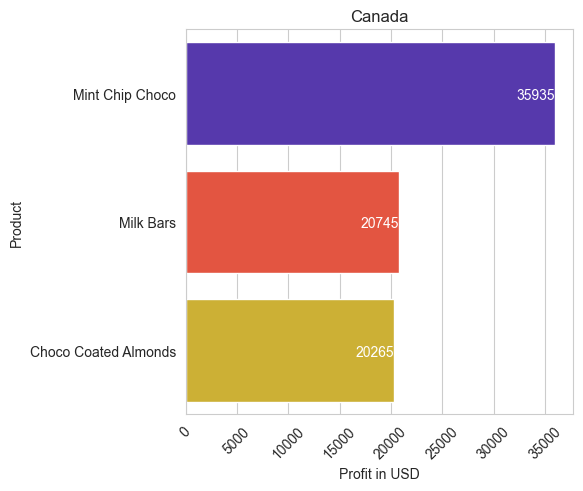

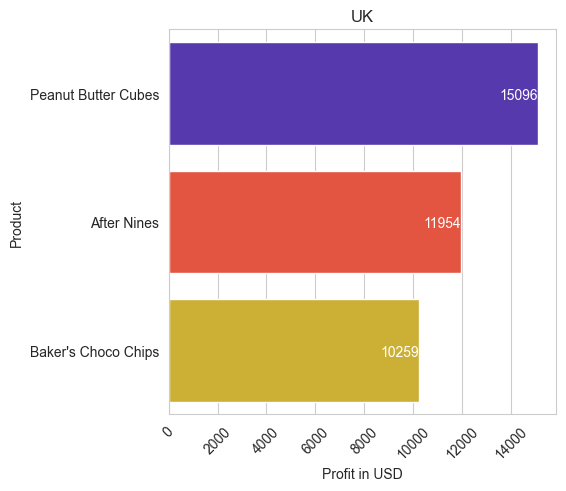

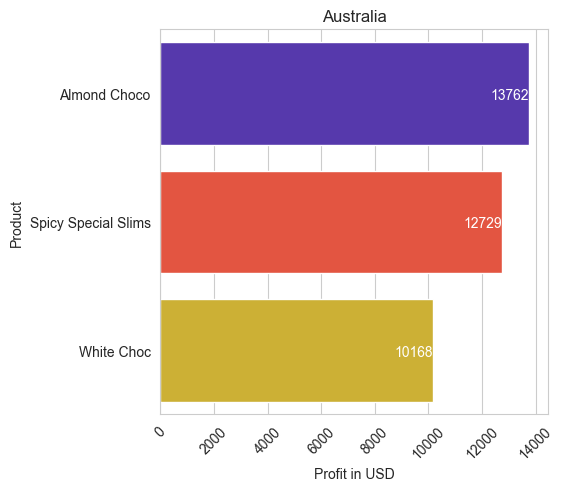

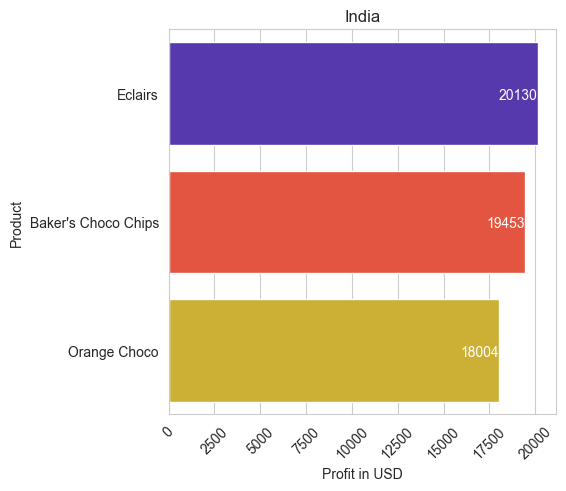

In [177]:
for i in country:
    plt.figure(figsize = (5,5))
    sns.barplot(sort_country, y = sort_country[sort_country['geography'] == i]['product'].head(3) , x = 'profit' , palette = 'CMRmap')
    plt.title(i)
    plt.xticks(rotation = 45)
    plt.xlabel('Profit in USD')
    plt.ylabel('Product')
    for k,y in enumerate(sort_country[sort_country['geography'] == i]['profit'].head(3)):
        plt.text(y,k,y ,color="white", ha="right", va="center_baseline" )
        
    plt.show()